# 6.5 Machine Learning Part 2

### This notbooke contains

#### 1. Importing libraries and data

#### 2. Data cleaning

#### 3. K-means clustering 


### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# ensuring the chart displayes in the notebook instead of having to call them specifically. 
%matplotlib inline

In [3]:
# Importing datafram
path= r"C:\Users\quinn\PycharmProjects\Netflix Analysis 07-23-2021"
df= pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'netflix_checked.csv'), index_col = False)

### 2. Data cleaning

In [4]:
# Looking at the head of the data frame
df.head()

,Unnamed: 0,Unnamed: 0.1,cast,type,title,country,date_added,release_year,description,director,duration,listed_in,rating,rt_info,rt_cast,rt_audience_score,rt_audience_#reviews,rt_tomatometer_score,rt_critics_#reviews,rt_critic_review
0,0,s2,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Movie,7:19,Mexico,23-Dec-16,2016,After a devastating earthquake hits Mexico Cit...,Jorge Michel Grau,93 min,"Dramas, International Movies",TV-MA,"{'Genre': 'drama', 'Original Language': 'Spani...","{'Elsa - Eloisa Delfin': 'Carmen Beato', 'Fern...",52.0,10,100.0,10.0,[{'Review': 'The intentions of this film are c...
1,1,s3,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Movie,23:59,Singapore,20-Dec-18,2011,"When an army recruit is found dead, his fellow...",Gilbert Chan,78 min,"Horror Movies, International Movies",R,"{'Genre': 'horror', 'Original Language': 'Chin...","{'Boss': 'Philip Hersh', 'Tan': 'Tedd Chan', '...",20.0,10,NaN,0.0,NaN
2,2,s4,"Elijah Wood, John C. Reilly, Jennifer Connelly...",Movie,9,United States,16-Nov-17,2009,"In a postapocalyptic world, rag-doll robots hi...",Shane Acker,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",PG-13,NaN,NaN,56.0,NaN,57.0,NaN,NaN
3,3,s5,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Movie,21,United States,1-Jan-20,2008,A brilliant group of students become card-coun...,Robert Luketic,123 min,Dramas,PG-13,"{'Genre': 'romance, comedy, drama', 'Original ...","{'Justin Sellers': 'Matt Wheeler', 'Sam Presco...",17.0,10,NaN,0.0,"[{'Review': 'Empty calories, yes, but tasty en..."
4,4,s7,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Movie,122,Egypt,1-Jun-20,2019,"After an awful accident, a couple admitted to ...",Yasir Al Yasiri,95 min,"Horror Movies, International Movies",TV-MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping unnamed columns and categorical columns
df_1=df.drop(['Unnamed: 0','Unnamed: 0.1','cast','type','title','country','date_added',
              'release_year','description','director','duration','listed_in','rating',
              'rt_info','rt_cast','rt_critic_review','rt_audience_#reviews','rt_critics_#reviews'],axis=1)

In [6]:
# Makeing sure it worked 
df_1.head()

,rt_audience_score,rt_tomatometer_score
0,52.0,100.0
1,20.0,NaN
2,56.0,57.0
3,17.0,NaN
4,NaN,NaN


In [7]:
df_1.shape

(9657, 2)

##### Missing Values

In [8]:
# Checking for missing values
df_1.isnull().sum()

rt_audience_score       4549
rt_tomatometer_score    5418
dtype: int64

In [9]:
# Makeing the rt audience score and tomatometer score meadian 
df_1['rt_audience_score'].fillna(df_1['rt_audience_score'].median(), inplace=True)
df_1['rt_tomatometer_score'].fillna(df_1['rt_tomatometer_score'].median(), inplace=True)

In [10]:
df_1.isnull().sum()

rt_audience_score       0
rt_tomatometer_score    0
dtype: int64

##### Duplicates Check

In [11]:
# Checking for duplicates
dups= df_1.duplicated()

In [12]:
dups.shape

(9657,)

### 2. The Elbow technique

In [13]:
# Trying to define a good amount of clusters for my graph
num_cl= range(1, 10) 
kmeans= [KMeans(n_clusters=i) for i in num_cl]

In [14]:
# Creating a score that representss a reat of variation for the given cluster options
score= [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))]
score

[-12299966.350418868,
 -5982706.126600748,
 -3948368.0575318094,
 -2331825.5877965437,
 -1393546.6514637833,
 -1123144.9706544727,
 -945701.2211284391,
 -798168.1012714298,
 -675235.2872606535]

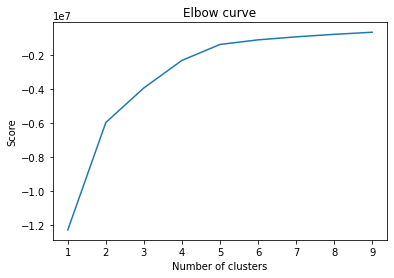

In [15]:
# ploting the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow curve')
pl.show()

In the Elbow curve you can see it jumps up from 1 all the way to 5 then starts to straighten out after that. I will be using 5 clusters it is not the highest point but it is at the end of the elbow.

### 3. K-means clustering 

In [16]:
# Creating a k-means object
kmeans= KMeans(n_clusters = 5, n_jobs = -1) 

In [17]:
# Fitting the k_means object to the data
kmeans.fit(df_1)

D:\SQL\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [18]:
df_1['clusters'] = kmeans.fit_predict(df_1)

D:\SQL\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [19]:
df_1.head()

,rt_audience_score,rt_tomatometer_score,clusters
0,52.0,100.0,4
1,20.0,60.0,1
2,56.0,57.0,0
3,17.0,60.0,1
4,67.0,60.0,0


In [20]:
df_1['clusters'].value_counts()

0    5759
4    1546
3     817
1     804
2     731
Name: clusters, dtype: int64

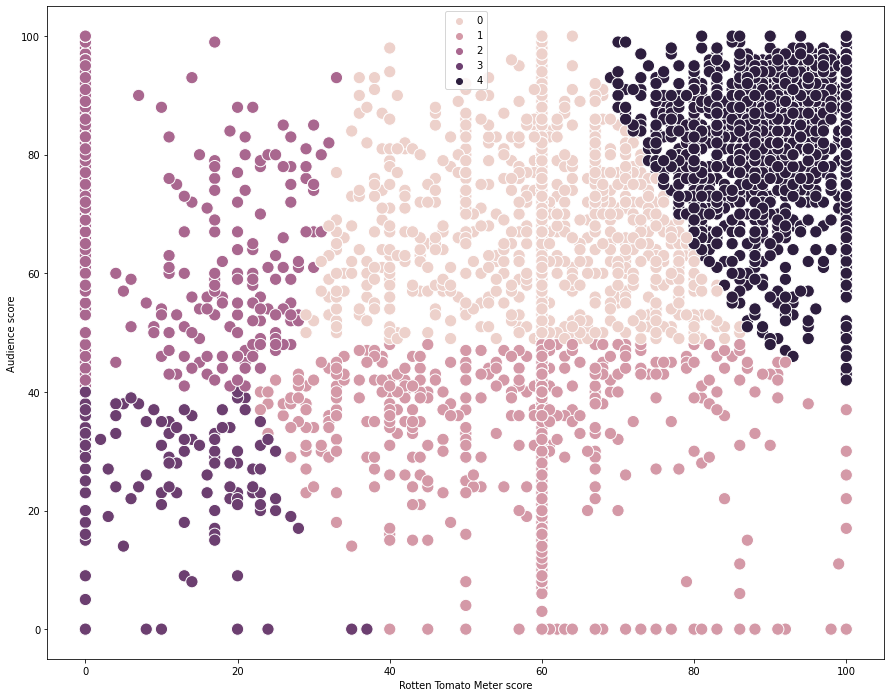

In [21]:
# Plotting the clusters on a graph
plt.figure(figsize=(15,12))
ax= sns.scatterplot(x=df_1['rt_tomatometer_score'], y=df_1['rt_audience_score'], hue=kmeans.labels_, s=150)
ax.grid(False)
plt.xlabel('Rotten Tomato Meter score')  
plt.ylabel('Audience score')
plt.show()

I can only plot this one graph the other cloumns will not fit with this assinment sorry

The graph does seperate them very nicely the one problem I have with the graph is the data since a lot of the points were made into the meadian most of the points are split between two clusters.

In [22]:
# giving them esaiers names for group by
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'lite pink'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'pink'
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'lite purple'
df_1.loc[df_1['clusters'] == 3, 'cluster'] = 'purple'
df_1.loc[df_1['clusters'] == 4, 'cluster'] = 'dark purple'

In [23]:
# creating the group by
df_1.groupby('cluster').agg({'rt_tomatometer_score':['mean','median'],
                            'rt_audience_score':['mean','median']})

rt_tomatometer_score        rt_audience_score       
                            mean median              mean median
cluster                                                         
dark purple            91.576973   93.0         81.647477   84.0
lite pink              59.884008   60.0         67.610870   67.0
lite purple             4.154583    0.0         77.149111   80.0
pink                   60.028607   60.0         29.965174   33.0
purple                  1.766218    0.0          4.394125    0.0

We can disregard dark purplee and lit pink for now becuse of the data. Looking at lite purple we can understand that the tomatometer scores a little higher then the saudience but on the other end the tomatometer scored movies or tv shows at 0 but the audience on the other hand rated it pretty high.
we can look in more detail why the rotten tomato score was so low compaerd to the audince scores.